# Linear regression

## Linear algebra formulation

### Projection matrices

A little detour on deriving projection matrices.

#### Why projecting onto subspaces?

The equation system $Ax = b$ might not have a solution, but there exists a _p_ so that $Ax=p$ is solvable. And (this is the key) I want _p_ to be the closest vector to the original vector _b_ !.

#### Finding the projection matrix

I will project a vector b to a subpace spanned by the columns of a matrix A. That is, its projection _p_, will be in the column space of A.

The key point is that, because we want the closest projected vector _p_ to _b_, _p_ has to be perpendicular to the column space of A.

__Note__: Multiplying _A_ with _b_ ($Ab=\hat{p}$) will successfully project _b_ onto the column space of _A_ (by definition), but that resulting vector $\hat{p}$ will not necessarily suffice our condition that it must be perpendicular to the plane!! And thus, it would be incorrect to think that $Ab=p$.

Graphically (notice the place, the vector _b_, the vector _p_, and the error vector _e_):
<img src='img/linalg_projection_matrix.png' />

With this in mind, the projection will be some multiple of the columns of the matrix _A_: $Ax=p$.

By definition, then, the error vector will be $e = b - p = b - Ax$.

And, by _our_ definition, the error vector will be perpendicular to the plane (that is, perpendicular to the columns of _A_), and so:

$$
A^T e = 0 \Rightarrow A^T (b-p) = 0 \Rightarrow A^T (b - Ax) \Rightarrow A^T b = A^T A x
$$

From which we can conclude that:
1. The vector _x_ (multiple of the columns of A) is:
$$
x = (A^T A) ^{-1} A^T b
$$
2. The projection $Ax$ is then:
$$
p = Ax = A (A^T A) ^{-1} A^T b
$$
3. And from the previous point, the projection matrix is (what is multiplying the original vector _b_):
$$
A (A^T A) ^{-1} A^T
$$

#### Properties of projection matrices
1. Projection matrices are symmetric: $P^T = P$
2. $P^2 = P$


### Linear Regression

Suppose we wanna fit a line to the following datapoints $[(1,1), (2,2), (3,2)]$. That system of equations has no solution. Instead, we want to find the _best line_, that is, the line that minimizes the error made for each datapoint; and we know those best projections (the ones that minimize the distance to the original points), are given by the projection matrix we saw in the previous section.

The line will have an equation $y = cx + d$. Formulating the problem in a linear algebra way, we have:
$$
A x = b \Rightarrow
\begin{bmatrix}
1 & 1 \\
2 & 1 \\
3 & 1
\end{bmatrix}
\begin{bmatrix}
c \\
d
\end{bmatrix}
=
\begin{bmatrix}
1 \\
2 \\
2
\end{bmatrix}
$$

As said before, there is no such $x=[c,d]$, and instead we will find $\hat{x}=[\hat{c}, \hat{d}]$ such that $A \hat{x} = p$ (with $b-p = [b_1, b_2, b_3] - [p_1, p_2, p_3]$ being ortogonal vectors to the columns space of _A_).

Finally, we solve this issue of finding the params [c, d] of the best line, by stating the projection matrix formula for $\hat{x}$ and solving:
$$
\hat{x} =
\begin{bmatrix}
\hat{c} & \hat{d}
\end{bmatrix}
= (A^T A)^{-1} A^T b
$$

x_hat = [ 0.5         0.66666667]


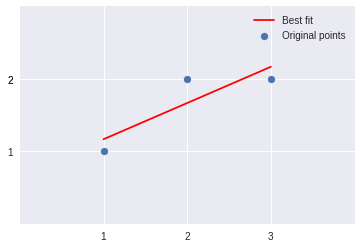

In [102]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A = np.array([[1,1],[2,1], [3,1]], dtype=np.float)
b = np.array([1,2,2], dtype=np.float)
x_hat = np.linalg.inv(A.T.dot(A)).dot(A.T.dot(b))
print('x_hat =', x_hat)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x=A[:,0], y=b, label='Original points')
ax.plot(A[:,0], np.dot(A, x_hat), c='r', label='Best fit')
ax.legend()
ax.set_xticks([1., 2., 3.])
ax.set_yticks([1., 2., 2.])
ax.set_ylim((0,3))
ax.set_xlim((0,4));